In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#저장할 수 있는 리스트 생성
epoch_arr=[]
cost_arr=[]
accuracy_arr=[]


step_val = 10000

def graph() :
    import matplotlib as mpl
    #컴퓨터에 설치된 폰트 확인.
    print(set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])))
    mpl.rc('font',family='MDSol')
    import matplotlib.font_manager as fm
    #mpl.rc('font', family='NanumGothic') #한글 설정 / 케바케라 원하는 사람은 하세요.
    mpl.rc('axes',unicode_minus=False) #음수부호 설정
    
    plt.title("한글") #한글경우 깨짐여부 체크용. 
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx() #x축을 공유하는 두개의 y축
    ax0.set_title("Ephoch : cost/ accuracy")
    ax0.plot(cost_arr, 'r-', label="cost")
    ax0.set_ylabel("cost")
    #ax0.aixs([0,step_val,0,1])

    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("accuracy")
    ax1.grid(False)
    ax1.set_xlabel("ephochs")
    ax1.axis([0, step_val, 0, 1])
    plt.show()

In [3]:
#여기의 코드는 11월27일의 코드와 동일하다.
learning_rate=0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data=[[0,0], [0,1], [1,0], [1,1] ]
y_data=[[0], [1], [1], [0] ]

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

#layer1 : 보내는쪽(입력층x1,x2)->은닉층1
W1 = tf.Variable(tf.random_normal([2,5], name='weight1'))
b1 = tf.Variable(tf.random_normal([5]),name='bias1' )
layer1 = tf.sigmoid(tf.matmul(X,W1) +b1)

#layer2 : 보내는쪽(은닉층1)->은닉층2
W2 = tf.Variable(tf.random_normal([5,5], name='weight2'))
b2 = tf.Variable(tf.random_normal([5]),name='bias2' )

hypothesis = tf.sigmoid(tf.matmul(layer1, W2) +b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis) )
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32 )
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32 ))

0
0 0.8985588 [[ 0.09167089  0.72692066  0.29150155 -1.611915    1.8532495 ]
 [ 0.60666865 -0.5069711  -0.0751102  -0.22473948 -0.38912082]
 [ 0.941981    1.3763018   2.0310912  -0.57708335  0.00443773]
 [-0.95060515  1.0431359  -0.82495636 -0.47150165  1.1172558 ]
 [-2.5245955  -0.93936896  2.0173376   0.34749538 -1.2782866 ]]

 Hypothesis: 
 [[0.06914574 0.6188377  0.6336384  0.2452988  0.7620773 ]
 [0.08390227 0.5533139  0.44104666 0.26291943 0.78114974]
 [0.11861724 0.576605   0.3544645  0.23313227 0.8190369 ]
 [0.13606057 0.56798875 0.2932687  0.23844334 0.828257  ]] 
Correct : 
 [[0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1.]] 
Accuracy : 
 0.45
[[ 0.12172935  2.7988198  -1.795457    0.30957043 -1.3198552 ]
 [-0.05356107  0.5442458  -1.5386457  -0.09692616 -0.60547566]] [[ 0.09167089  0.72692066  0.29150155 -1.611915    1.8532495 ]
 [ 0.60666865 -0.5069711  -0.0751102  -0.22473948 -0.38912082]
 [ 0.941981    1.3763018   2.0310912  -0.57708335  0.00443773]


7000
7000 0.29161352 [[ 3.1257708   2.8391702   2.2451117   1.4753983   3.5472162 ]
 [ 1.2915868   0.35769048  1.9840795   0.90545523  0.16739304]
 [ 1.2800977   1.1732234   1.3952584  -0.48451927 -0.1461665 ]
 [-1.130733    0.10241728 -1.5994785  -1.1252145  -0.06537816]
 [-4.3038826  -4.4001656  -2.9627373  -2.977552   -4.745849  ]]

 Hypothesis: 
 [[0.09421593 0.11280659 0.13008407 0.1333265  0.11139122]
 [0.8219336  0.796722   0.787449   0.70194554 0.79338336]
 [0.7783731  0.7669762  0.72398984 0.7159385  0.81146336]
 [0.35551578 0.37827516 0.4169126  0.5151646  0.33341905]] 
Correct : 
 [[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0.]] 
Accuracy : 
 0.95
[[-2.8659663   3.8329482  -1.5328139   0.79071045 -5.959204  ]
 [-3.0014343   3.4180422   0.16536337  0.10139898 -5.928968  ]] [[ 3.1257708   2.8391702   2.2451117   1.4753983   3.5472162 ]
 [ 1.2915868   0.35769048  1.9840795   0.90545523  0.16739304]
 [ 1.2800977   1.1732234   1.3952584  -0.48451927 -0.146

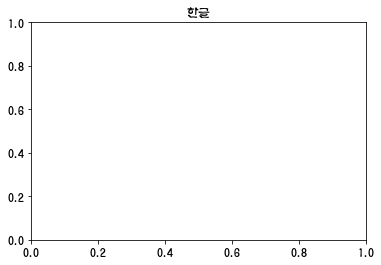

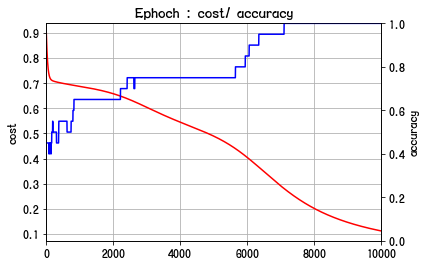

In [4]:
#이부분은 조금 다르니 찬찬히 보길...
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_val):
        sess.run(train, feed_dict={X: x_data, Y:y_data})
        if step % (step_val/10) == 0:
            print(step)
            
        if step % 1000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y:y_data }) , sess.run(W2) )            
            h,c,a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
            print("\n Hypothesis: \n", h, "\nCorrect : \n", c, "\nAccuracy : \n", a )
            print(sess.run(W1),sess.run(W2),sess.run(b1),sess.run(b2), )
            
        h,a = sess.run([cost, accuracy], feed_dict={X:x_data, Y:y_data})
        epoch_arr.append(step)
        cost_arr.append(h)
        accuracy_arr.append(a)
        
        
graph()        
            

In [6]:
!pip install requests

In [15]:
import requests
#import BeautifulSoup4
from bs4 import BeautifulSoup

In [8]:
!pip install beautifulsoup4

In [11]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1277 sha256=3a59cb3d1c2ea358706e126bd9157cb8791573b2696062c5f4efd2d7ffc59692
  Stored in directory: c:\users\gimboseong\appdata\local\pip\cache\wheels\0a\9e\ba\20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
